In [120]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr

In [121]:
#create a pandas dataframes from csv files
users = pd.read_csv('users.csv')
tweets = pd.read_csv('new_tweets.csv',lineterminator='\n', index_col=0)

In [122]:
users.info()
users.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


id                  int64
name               object
lang               object
bot                 int64
created_at         object
statuses_count    float64
dtype: object

## Trasformazione delle colonne in tipi

In [123]:

users['id'] = pd.to_numeric(users['id'], errors='coerce')
users['created_at'] = pd.to_datetime(users['created_at'], errors='coerce')

## Eliminazione dei valori negativi

In [124]:

users['statuses_count'] = users['statuses_count'].abs()

## User analysis 

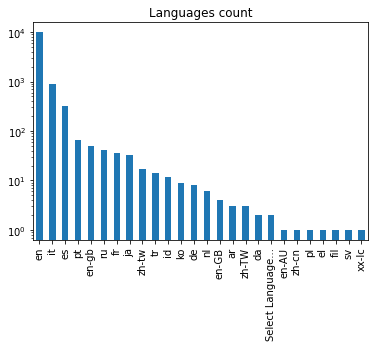

In [125]:
users['lang'].value_counts().plot(kind='bar', title='Languages count')
plt.yscale('log')
plt.show()

#### Lang Correction

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/reshape/merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,special,text_lenght,name,lang,bot,subscribing_date,statuses_count
0,4.912745e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-23 17:32:30,"Spent the majority of my day drawing around, c...",10,111,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
1,4.886930e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-16 14:34:25,We all love dem cuddles. http://t.co/fPrcnUfacS,10,47,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
2,4.854109e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-07 13:12:33,Dog sitting until 8 tonight. Again..,5,36,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
3,1.683542e+15,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-16 20:58:50,NaN,0,0,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
4,7.055459e+09,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2020-02-27 20:17:18,The chocolate is soooooooooooo amazing.,2,39,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,5.910286e+17,2.956614e+09,61.0,0.0,0.0,0.0,1.0,1.0,2020-04-23 23:59:43,RT @LivvyAllison: If you are reading the front...,20,120,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2168,4.789901e+10,2.956614e+09,3.0,0.0,0.0,2.0,0.0,2.0,2020-03-19 10:54:49,RT @sophieraworth: Last night over Sweden... R...,30,137,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2169,5.939970e+17,2.956614e+09,0.0,0.0,0.0,0.0,1.0,0.0,2020-05-02 04:35:05,I think even super heroes should rest at weeke...,12,75,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2170,7.268000e+16,2.956614e+09,3.0,0.0,1.0,0.0,0.0,3.0,2020-05-01 19:38:48,@annabf @CampbellLiveNZ @UniteUnion well done,9,45,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0


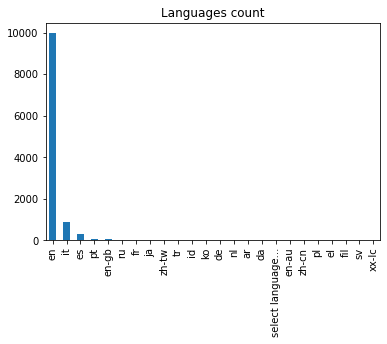

In [126]:
users['lang'] = users['lang'].str.lower()
users['lang'].value_counts().plot(kind='bar', title='Languages count')

users.rename(columns={
    'id' : 'user_id',
    'created_at' : 'subscribing_date'
}, inplace=True)
nal = users[(users['lang'] == 'select language...') | (users['lang'] == 'xx-lc')]

text_nal = tweets.merge(nal, on='user_id')
text_nal

In [127]:
text_nal[text_nal['name'] == 'Leanne Arker'].head(3)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,special,text_lenght,name,lang,bot,subscribing_date,statuses_count
2110,5.866970e+17,2.956614e+09,0.0,0.0,0.0,0.0,0.0,1.0,2020-04-12 01:07:12,@bernardchickey I've heard of something called...,7,137,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2111,5.751565e+17,2.956614e+09,0.0,0.0,0.0,0.0,0.0,1.0,2020-03-11 04:49:27,@Hilary_Barry Gives new meaning to the term sl...,5,62,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2112,-1.000000e+00,2.956614e+09,9.0,0.0,0.0,0.0,0.0,1.0,2020-03-26 19:04:58,NaN,0,0,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0


##### Users without a language are en

In [128]:
users['lang'].replace('select language...', 'en', inplace=True)
users['lang'].replace('xx-lc', 'en', inplace=True)

### Calculate for each user how much tweets we have in tweets.csv

In [129]:

users = users.merge(tweets[['user_id', 'id']].groupby('user_id', as_index=False).count(), on='user_id')
users = users.rename(columns={'id' : 'count'})
users.head(10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/reshape/merge.py:1215: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,user_id,name,lang,bot,subscribing_date,statuses_count,count
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,132
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,122
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0,4
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0,1434
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0,3650
5,2199062688,Qq,en,0,2018-11-19 06:58:18,7406.0,2000
6,1174869769,Tania Wren,en,1,2018-02-15 10:51:28,21.0,21
7,3118659848,charlotte gray,en,0,2020-03-31 21:19:59,115.0,119
8,616225564,Anisha Williams,en,0,2017-06-25 15:49:36,NaN,59
9,2357425536,Meda Tatlock,en,1,2019-02-25 04:30:56,69.0,150


### Bot Analysis

Check if there are only 0 and 1 values

In [130]:
users.bot.unique()

array([1, 0])

### User's created at analysis (previously we changed the name of the attribute in 'subscribing_date')

In [131]:
users[users['subscribing_date'] > datetime.now()]

,user_id,name,lang,bot,subscribing_date,statuses_count,count


In [132]:
users[users['subscribing_date'] < datetime.strptime("2006-07-15 00:00:00", "%Y-%m-%d %H:%M:%S")]

,user_id,name,lang,bot,subscribing_date,statuses_count,count


### Summing parameters in users (likes received, retweet and reply received)

In [133]:
new_tweets = tweets.filter(['user_id', 'retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions'], axis=1)
new_users = users.merge(new_tweets.groupby('user_id').sum(), on='user_id')
new_users = new_users.rename(columns={
    'retweet_count' : 'retweet_received',
    'reply_count' : 'reply_received',
    'favorite_count' : 'favorite_received',
    'num_hashtags' : 'hashtag_used',
    'num_urls' : 'urls_used',
    'num_mentions' : 'mentions_used'}, 
    errors='raise'
)
new_users.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/reshape/merge.py:1215: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,user_id,name,lang,bot,subscribing_date,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,mentions_used
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,132,5.0,0.0,5.0,13.0,0.0,37.0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,122,3.0,0.0,6.0,4.0,0.0,41.0
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0,4,0.0,0.0,0.0,0.0,0.0,0.0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0,1434,631.0,0.0,248.0,92.0,36.0,3.0
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0,3650,61.0,0.0,223.0,475.0,3.0,1913.0


In [134]:
new_users[\
    (new_users['retweet_received'].isna() == True) |\
    (new_users['reply_received'].isna() == True) |\
    (new_users['favorite_received'].isna() == True) |\
    (new_users['hashtag_used'].isna() == True) |\
    (new_users['urls_used'].isna() == True) |\
    (new_users['mentions_used'].isna() == True)
        ].head()

,user_id,name,lang,bot,subscribing_date,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,mentions_used


In [135]:
new_users['reply_received'] = new_users['reply_received'].fillna(-1)
new_users['retweet_received'] = new_users['retweet_received'].fillna(-1)
new_users['statuses_count'] = new_users['statuses_count'].fillna(-1)

In [136]:
new_users['reply_received'] = new_users['reply_received'].astype(int)
new_users['retweet_received'] = new_users['retweet_received'].astype(int)
new_users['favorite_received'] = new_users['favorite_received'].astype(int)
new_users['hashtag_used'] = new_users['hashtag_used'].astype(int)
new_users['urls_used'] = new_users['urls_used'].astype(int)
new_users['mentions_used'] = new_users['mentions_used'].astype(int)
new_users['statuses_count'] = new_users['statuses_count'].astype(int)

### Ratio

In [137]:
new_users['like/statuses'] = round(new_users['favorite_received'] / new_users['count'], 2)
new_users.head(3)
users = new_users

### Write new file csv

In [138]:
users.to_csv('new_users.csv')